In [1]:
import scipy.stats as sc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
rezultati = pd.DataFrame({})
for i in np.arange(2,50,2):
    for j in range(100):
        for s in [0.1,1.,2]:
            Uzorak = np.random.normal(1,s,i)
            T = sc.ttest_1samp(Uzorak,0)
            rezultati=rezultati.append({'N':i,'s':s,'P':T[1],'Skewness':sc.skew(Uzorak),'Kurtosis':sc.kurtosis(Uzorak)},ignore_index=True)
        

In [3]:
rezultati.head()

,Kurtosis,N,P,Skewness,s
0,-2.0,2.0,0.009226,-1.180908e-14,0.1
1,-2.0,2.0,0.065868,0.000000e+00,1.0
2,-2.0,2.0,0.052958,0.000000e+00,2.0
3,-2.0,2.0,0.011734,0.000000e+00,0.1
4,-2.0,2.0,0.290027,3.499786e-16,1.0


/home/marko/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/home/marko/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/home/marko/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
/home/marko/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """


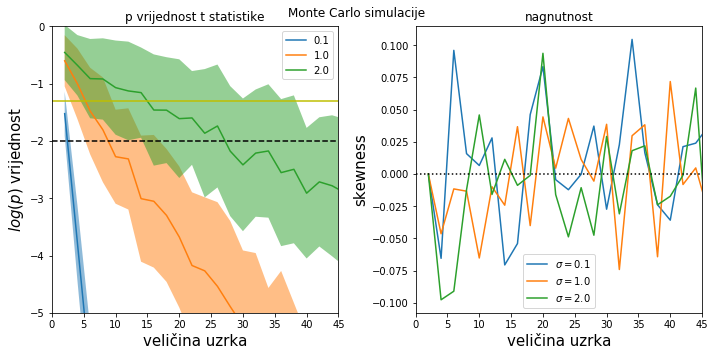

In [4]:
f, axs = plt.subplots(1,2,figsize=(10,5))
for s in pd.unique(rezultati['s']):
    usrednjeni = np.log10(rezultati[rezultati['s']==s]).groupby(rezultati['N']).mean()
    usrednjeni2 = (rezultati[rezultati['s']==s]).groupby(rezultati['N']).mean()
    std        = np.log10(rezultati[rezultati['s']==s]).groupby(rezultati['N']).std()
    axs[0].fill_between(usrednjeni.index,usrednjeni['P']-std['P'],usrednjeni['P']+std['P'],alpha=.5)
    axs[0].plot(usrednjeni.index,usrednjeni['P'],label=s)
    axs[1].plot(usrednjeni2.index,usrednjeni2['Skewness'], label='$\sigma=%.1f$'%s)
axs[0].set_title('p vrijednost t statistike')
axs[1].set_title('nagnutnost')
axs[0].set_ylim(-5,0)
axs[0].set_xlim(0,45)
axs[0].legend()
axs[1].legend()
axs[0].axhline(-2,color='k',ls='dashed')
axs[0].set_xlabel('veličina uzrka',fontsize=15)
axs[0].set_ylabel('$log(p)$ vrijednost',fontsize=15)
axs[1].set_xlabel('veličina uzrka',fontsize=15)
axs[1].set_ylabel('skewness',fontsize=15)
axs[1].axhline(0,color='k',ls='dotted')
axs[0].axhline(np.log10(0.05), color='y')
axs[1].set_xlim(0,45)
f.suptitle('Monte Carlo simulacije')
f.tight_layout()
f.savefig('slika1.pdf')

In [5]:
usrednjeni

,Kurtosis,N,P,Skewness,s
N,,,,,
2.0,NaN,0.301030,-0.454858,-inf,0.30103
4.0,NaN,0.602060,-0.678957,-0.592190,0.30103
6.0,-0.386769,0.778151,-0.911816,-0.487756,0.30103
8.0,-0.210090,0.903090,-0.917713,-0.525019,0.30103
10.0,-0.540216,1.000000,-1.069009,-0.469724,0.30103
12.0,-0.163458,1.079181,-1.126652,-0.608450,0.30103
14.0,-0.306547,1.146128,-1.156065,-0.625016,0.30103
16.0,-0.457764,1.204120,-1.459999,-0.603184,0.30103
18.0,-0.286026,1.255273,-1.462155,-0.734130,0.30103


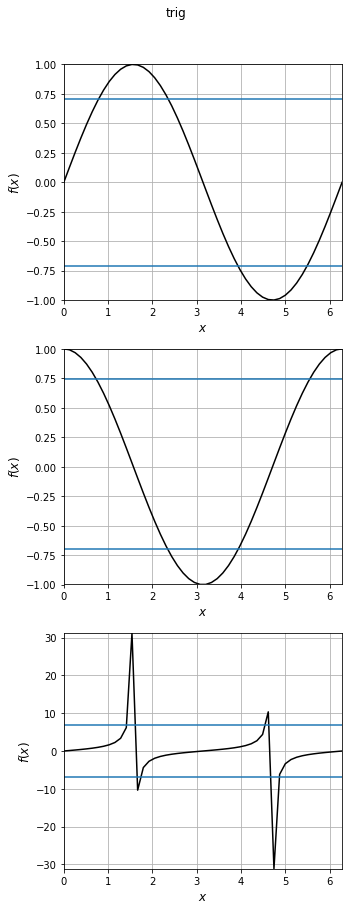

In [6]:
def format(ax,x,y,fontsize=12):
    ax.set_xlim(0,2*np.pi)
    ax.plot(x,y, color='k')
    ax.grid(True)
    ax.axhline(y.mean()+y.std())
    ax.axhline(y.mean()-y.std())
    ax.set_ylim(y.min(),y.max())
    ax.set_xlabel('$x$',fontsize=fontsize)
    ax.set_ylabel('$f(x)$',fontsize=fontsize)
    
vjezba = pd.DataFrame({})
vjezba['x']=np.linspace(0,2*np.pi)
vjezba['sinx']=np.sin(np.linspace(0,2*np.pi))
vjezba['cosx']=np.cos(np.linspace(0,2*np.pi))
vjezba['tanx']=np.tan(np.linspace(0,2*np.pi))
vjezba.head()
f,a=plt.subplots(3,1,figsize=(5,12))
format(a[0],vjezba['x'],vjezba['sinx'])
format(a[1],vjezba['x'],vjezba['cosx'])
format(a[2],vjezba['x'],vjezba['tanx'])
f.suptitle("trig", y=1.05)
f.tight_layout()
f.savefig('trigonometrijske.pdf')



,x,sinhx,coshx,tanhx
x,1.000000,0.805684,0.803945,0.698701
sinhx,0.805684,1.000000,0.999994,0.327676
coshx,0.803945,0.999994,1.000000,0.324518
tanhx,0.698701,0.327676,0.324518,1.000000


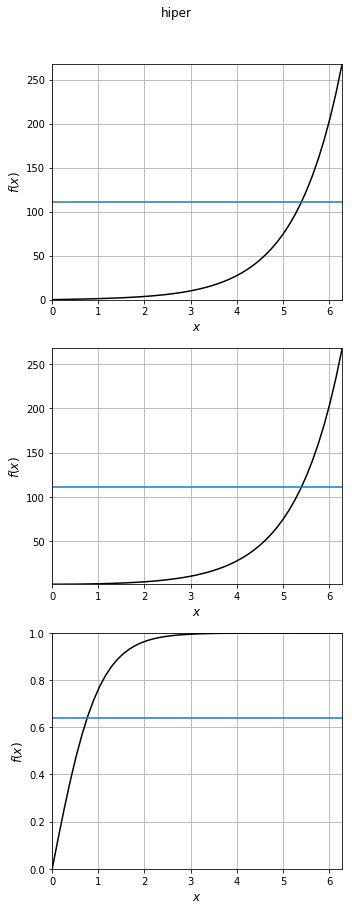

In [7]:
def format(ax,x,y,fontsize=12):
    ax.set_xlim(0,2*np.pi)
    ax.plot(x,y, color='k')
    ax.grid(True)
    ax.axhline(y.mean()+y.std())
    ax.axhline(y.mean()-y.std())
    ax.set_ylim(y.min(),y.max())
    ax.set_xlabel('$x$',fontsize=fontsize)
    ax.set_ylabel('$f(x)$',fontsize=fontsize)
    
       
vjezba2 = pd.DataFrame({})
vjezba2['x']=np.linspace(0,2*np.pi)
vjezba2['sinhx']=np.sinh(np.linspace(0,2*np.pi))
vjezba2['coshx']=np.cosh(np.linspace(0,2*np.pi))
vjezba2['tanhx']=np.tanh(np.linspace(0,2*np.pi))
vjezba.head()
f,a=plt.subplots(3,1,figsize=(5,12))
format(a[0],vjezba2['x'],vjezba2['sinhx'])
format(a[1],vjezba2['x'],vjezba2['coshx'])
format(a[2],vjezba2['x'],vjezba2['tanhx'])
f.suptitle("hiper", y=1.05)
f.tight_layout()
f.savefig('hiperboličke.pdf')

vjezba2.describe()
vjezba2.corr()
    

In [8]:
vjezba2

,x,sinhx,coshx,tanhx
0,0.000000,0.000000,1.000000,0.000000
1,0.128228,0.128580,1.008233,0.127530
2,0.256457,0.259277,1.033066,0.250978
3,0.384685,0.394243,1.074908,0.366769
4,0.512913,0.535700,1.134449,0.472212
5,0.641141,0.685978,1.212669,0.565676
6,0.769370,0.847550,1.310855,0.646563
7,0.897598,1.023077,1.430625,0.715126
8,1.025826,1.215449,1.573950,0.772229
9,1.154054,1.427834,1.743190,0.819093


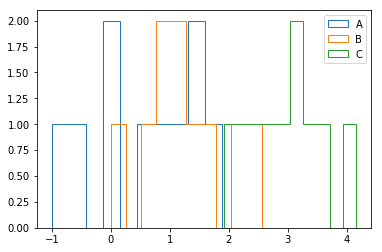

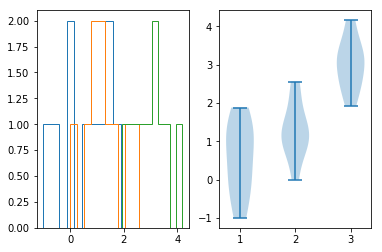

In [65]:
A=np.random.normal(1,1,10)
B=np.random.normal(1,1,10)
C=np.random.normal(3,1,10)
plt.hist(A,histtype='step',label='A')
plt.hist(B,histtype='step',label='B')
plt.hist(C,histtype='step',label='C')
plt.legend()
f,axs=plt.subplots(1,2)
axs[0].hist(A,histtype='step',label='A')
axs[0].hist(B,histtype='step',label='B')
axs[0].hist(C,histtype='step',label='C')
axs[1].violinplot((A,B,C))
tablica=pd.DataFrame({})
sc.f_oneway(A,B,C)
tablica=tablica.append(pd.DataFrame({"Y":A,'T':np.full(A.size,'A')}),ignore_index=True)
tablica=tablica.append(pd.DataFrame({"Y":B,'T':np.full(B.size,'B')}),ignore_index=True)
tablica=tablica.append(pd.DataFrame({"Y":C,'T':np.full(C.size,'C')}),ignore_index=True)

In [66]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
lm = ols('Y~T',tablica).fit()
print(lm.summary())
tablica2 = anova_lm(lm)
print(tablica2)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     25.90
Date:                Thu, 09 May 2019   Prob (F-statistic):           5.26e-07
Time:                        23:05:20   Log-Likelihood:                -33.648
No. Observations:                  30   AIC:                             73.30
Df Residuals:                      27   BIC:                             77.50
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5532      0.248      2.234      0.0

In [17]:
sc.ks_2samp(A,C)

Ks_2sampResult(statistic=0.6900000000000001, pvalue=6.666540553634539e-22)

In [18]:
sc.kurtosistest(A)

KurtosistestResult(statistic=1.1785303630306891, pvalue=0.23858523500007578)

In [21]:
sc.normaltest(A)

/home/marko/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


NormaltestResult(statistic=0.8128516032183899, pvalue=0.6660265118781539)

In [27]:
tablica["Z"]=tablica["Y"]**2
pd.pivot_table(tablica,["Y","Z"],"T",aggfunc=[np.mean,np.std,sc.kurtosistest])

/home/marko/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))
/home/marko/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))
/home/marko/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))
/home/marko/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))
/home/marko/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))
/home/marko/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosist

mean                  std            \
          Y          Z         Y         Z   
T                                            
A  1.588789   3.477075  1.028928  3.855168   
B  1.114065   1.766601  0.764098  1.330776   
C  3.098369  11.456442  1.436259  9.150844   

                                kurtosistest  \
                                           Y   
T                                              
A   (0.6331793593121534, 0.5266165230497437)   
B  (0.13396499889902042, 0.8934302517330767)   
C   (-0.477641988972756, 0.6329050399630192)   

                                               
                                            Z  
T                                              
A  (2.5170677892122906, 0.011833605864608382)  
B   (-1.202281520953676, 0.22925447396247545)  
C    (-0.658147506907355, 0.5104433516566949)

In [24]:
print(pd.pivot_table.__doc__)


Create a spreadsheet-style pivot table as a DataFrame. The levels in
the pivot table will be stored in MultiIndex objects (hierarchical
indexes) on the index and columns of the result DataFrame.

Parameters
----------
data : DataFrame
values : column to aggregate, optional
index : column, Grouper, array, or list of the previous
    If an array is passed, it must be the same length as the data. The
    list can contain any of the other types (except list).
    Keys to group by on the pivot table index.  If an array is passed,
    it is being used as the same manner as column values.
columns : column, Grouper, array, or list of the previous
    If an array is passed, it must be the same length as the data. The
    list can contain any of the other types (except list).
    Keys to group by on the pivot table column.  If an array is passed,
    it is being used as the same manner as column values.
aggfunc : function, list of functions, dict, default numpy.mean
    If list of functions pas

0.042225220632274595 0.577557215093803
0.015538114505977642 0.4921091649666036


Ks_2sampResult(statistic=0.15700000000000003, pvalue=0.019980513430010637)

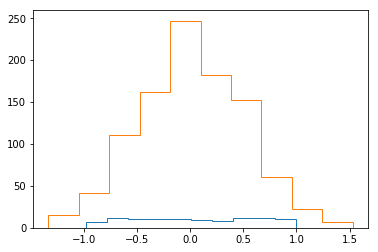

In [36]:
uzorak_a=np.random.uniform(-1,1,100)
uzorak_b=np.random.normal(0,0.5,1000)
sc.f_oneway(uzorak_a,uzorak_b)
plt.hist(uzorak_a, histtype='step')
plt.hist(uzorak_b, histtype='step')
print(np.mean(uzorak_a),np.std(uzorak_a))
print(np.mean(uzorak_b),np.std(uzorak_b))
sc.ks_2samp(uzorak_a,uzorak_b)

In [42]:
tablica3=pd.DataFrame({})
tablica3=tablica3.append(pd.DataFrame({'X':uzorak_a,'C':np.full(np.size(uzorak_a),'A')}))
tablica3=tablica3.append(pd.DataFrame({'X':uzorak_b,'C':np.full(np.size(uzorak_b),'B')}))

In [ ]:
def nova_kurt(x):
    return sc.kurtosistest(x)[1]


In [54]:
pd.pivot_table(tablica3,'X','C',aggfunc=[np.mean,
                                         np.std,
                                         lambda x:sc.kstest(x,'norm')[1]],)

,mean,std,<lambda>
,X,X,X
C,,,
A,0.042225,0.580467,8.552921e-03
B,0.015538,0.492355,8.865005e-27


$y=ax+b$
$\sigma_y(x)=\sqrt{\Sigma_{aa}*x^2+\Sigma_{ab}*2*x+\Sigma_{bb}}$

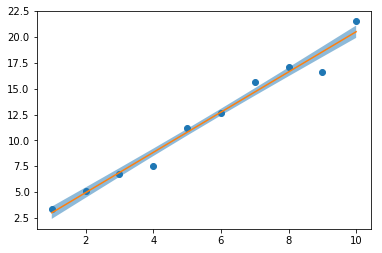

In [83]:
from scipy.optimize import curve_fit
def linearna(x,a,b):
    return a*x+b
x=np.linspace(1,10,10)
y=2*x+np.random.normal(0,1,x.size)
plt.plot(x,y,"o")
bf, Cov=curve_fit(linearna,x,y)
sigmay=np.sqrt(Cov[0,0]*x**2+Cov[1,1]+2*Cov[0,1]*x)
bfy = linearna(x,bf[0],bf[1])
plt.plot(x,bfy)
plt.fill_between(x,bfy-sigmay,bfy+sigmay,alpha=0.5)

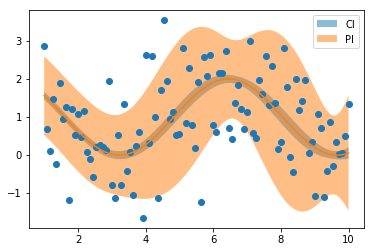

In [89]:
from scipy.optimize import curve_fit
def cos(x,a,b):
    return a+np.cos(x*b)
x=np.linspace(1,10,100)
y=cos(x,1,1)+np.random.normal(0,1,x.size)
plt.plot(x,y,"o")
bf, Cov=curve_fit(cos,x,y)
sigmay=np.sqrt(Cov[0,0]+Cov[1,1]*(x*np.sin(bf[1]*x))**2-2*Cov[0,1]*x*np.sin(bf[1]*x))
bfy = cos(x,bf[0],bf[1])
plt.plot(x,bfy)
plt.fill_between(x,bfy-sigmay,bfy+sigmay,alpha=0.5,label="CI")
N = np.size(x)
plt.fill_between(x,bfy-np.sqrt(N-1)*sigmay,bfy+np.sqrt(N-1)*sigmay,alpha=0.5,label="PI")
plt.legend()

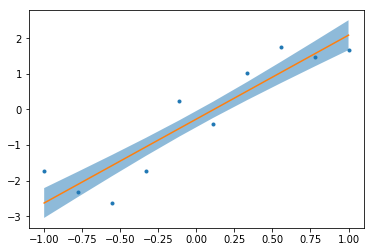

In [108]:
x = np.linspace(-1,1,10)
y = np.random.normal(2,0.1,10)*x+np.random.normal(0,1,10)
f,ax=plt.subplots(1,1)
ax.plot(x,y,'.')
def lin(x,a,b):
        return a*x+b
p,cov=curve_fit(lin,x,y)
ax.plot(x,lin(x,p[0],p[1]))
sigmay=np.sqrt(x**2*cov[0,0]+2*x*cov[0,1]+cov[1,1])
confidence_interval=ax.fill_between(x,lin(x,p[0],p[1])-sigmay,lin(x,p[0],p[1])+sigmay, alpha=0.5
                                   )

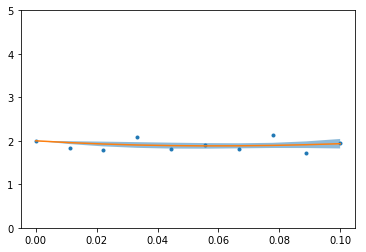

In [232]:
def model(x,a,b):
    return np.exp(-x*a)+np.exp(-x*(a+b))
x = np.linspace(0,0.1,10)
a = np.random.normal(0.5,0.5,10)
b = np.random.normal(0.5,0.5,10)
y = model(x,a,b)+np.random.normal(0,0.1,10)
f, ax=plt.subplots(1,1)
p, cov=curve_fit(model,x,y)
ax.plot(x,y,'.')
ax.set_ylim(0,5)
ax.plot(x,model(x,p[0],p[1]))
a,b=p
sigmay=np.sqrt(cov[0,0]*(x*np.exp(-x*a)*(1+np.exp(-x*b)))**2+cov[1,1]*(x*np.exp(-x*(a+b)))**2+2*x**2*cov[0,1]*np.exp(-x*a)*(1+np.exp(-x*b))*np.exp(-x*(a+b)))
ax.fill_between(x,model(x,p[0],p[1])-sigmay,model(x,p[0],p[1])+sigmay,alpha=0.5)

In [123]:
p,np.sqrt(cov[0,0])

(array([7.40938154e-01, 3.50979720e-04]), 735.9929543256446)

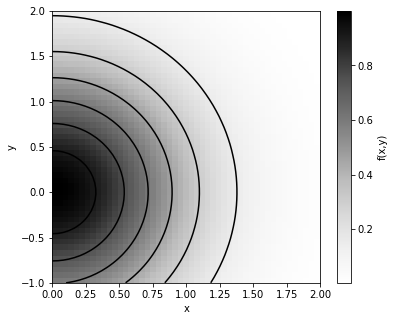

In [145]:
x=np.linspace(0,2)
y=np.linspace(-1,2)
X,Y=np.meshgrid(x,y)
def z(x,y):
    return y*x**2
def gauss(x,y):
        return np.exp(-(x**2+y**2/2.))
f,ax=plt.subplots(1,1,figsize=(6,5))
im=ax.pcolormesh(X,Y,gauss(X,Y),cmap='Greys')
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.colorbar(im,ax=ax).set_label('f(x,y)')
ax.contour(X,Y,gauss(X,Y),colors="k")

# Martingali
Niz slučajnih varijabli

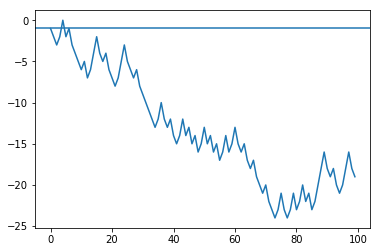

In [228]:
Betting = pd.DataFrame(2*np.random.binomial(1,0.5,100)-1,columns=["bet"])
pocetni_ulog = 1.
kapital = 1.
ulog = pocetni_ulog
Betting.loc[0,"ulog"]=pocetni_ulog
for i in range(1,len(Betting["bet"])):
    if Betting.loc[i-1,"bet"]>0:
        Betting.loc[i,"ulog"]=2*ulog
    else:
        Betting.loc[i,"ulog"]=ulog
Betting["ukupni trosak"] = np.cumsum(Betting["ulog"]*Betting["bet"])
plt.plot(Betting.index,Betting["ukupni trosak"])
plt.axhline(-kapital)

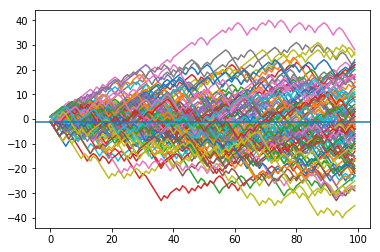

In [230]:
for j in range(100):
    Betting = pd.DataFrame(2*np.random.binomial(1,0.5,100)-1,columns=["bet"])
    pocetni_ulog = 1.
    kapital = 1.
    ulog = pocetni_ulog
    Betting.loc[0,"ulog"]=pocetni_ulog
    for i in range(1,len(Betting["bet"])):
        if Betting.loc[i-1,"bet"]>0:
            Betting.loc[i,"ulog"]=ulog
        else:
            Betting.loc[i,"ulog"]=2*ulog
    Betting["ukupni trosak"] = np.cumsum(Betting["ulog"]*Betting["bet"])
    plt.plot(Betting.index,Betting["ukupni trosak"])
plt.axhline(-kapital)

1. Naplotati točke
2. Pronaći best-fit krivulju
3. Označiti CI
4. Izračunati reziduale
5. Napraviti histogram reziduala
6. Provjeriti jesu li reziduali distribuirani po normalnoj distribuciji

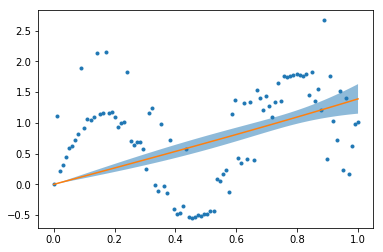

In [244]:
x=np.linspace(0,1,100)
y=np.sin(np.random.normal(10,.5,100)*x)+x+np.random.binomial(1,.2,100)
def fja(x,a,b):
    return np.sin(a*x)+b*x
p,cov=curve_fit(fja,x,y)
f, ax=plt.subplots(1,1)
ax.plot(x,y,'.')
ax.plot(x,fja(x,p[0],p[1]))
a,b=p
sigmay=np.sqrt(cov[0,0]*(np.cos(a*x)*x)**2+cov[1,1]*x**2+2*cov[0,1]*x**2*np.cos(a*x))
ax.fill_between(x,fja(x,p[0],p[1])-sigmay,fja(x,p[0],p[1])+sigmay,alpha=0.5)
def rezidual(x,fja,y):
    return (fja(x,p[0],p[1])-y)/(sigmay+0.01)


(array([ 1.,  0.,  0.,  0.,  1.,  2.,  4., 14., 43., 35.]),
 array([-81.75942568, -72.63642304, -63.5134204 , -54.39041777,
        -45.26741513, -36.14441249, -27.02140985, -17.89840721,
         -8.77540458,   0.34759806,   9.4706007 ]),
 <a list of 10 Patch objects>)

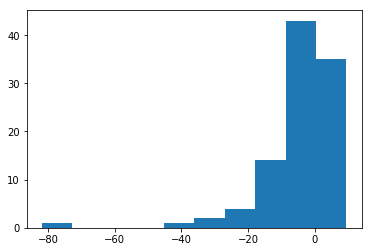

In [245]:
plt.hist(rezidual(x,fja,y))


In [250]:
sc.kstest(rezidual(x,fja,y),'binom',args=(1,0.2))

KstestResult(statistic=0.62, pvalue=1.3760265109004223e-37)

In [254]:
sc.skew(rezidual(x,fja,y))

-2.8207368092018563

In [256]:
from pandas_datareader import data, wb

ModuleNotFoundError: No module named 'pandas_datareader'